# Анализ бизнес показателей приложения

Компания, выпустившая приложение ProcrastinatePro+, терпит убытки, несмотря на большие вложения в рекламу.

<b>Цель исследования:</b> узнать причины убытков компании

<b>План исследования:</b>
1. Загрузка данных
2. Предобработка данных
3. Написать функции для расчета и анализа маркетинговых метрик
4. Провести исследовательский анализ данных
5. Анализ расходов на маркетинг
6. Оценка окупаемости рекламы
7. Формирование выводов

Данные представлены тремя датасетами: `visits_info_short.csv`, `orders_info_short.csv`, `costs_info_short.csv`. В первом хранится лог сервера с информацией о посещениях сайта. Во втором - данные о заказах, в третьем - данные о рекламных расходах.

## Импорт библиотек, загрузка данных и изучение основной информации

Импортируем необходимые библиотеки.

In [6]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

Сохраним данные о визитах, заказах и рекламных расходах в переменные visits, orders и costs соответственно. Посмотрим информацию о них и выведем первые 5 строк каждого из них.

In [8]:
# данные о посещениях
url_id = '1wBm1StlQ3ZJFEKY0-gvvI0TO9qiamDXh'
url = 'https://drive.google.com/uc?id=' + url_id
visits = pd.read_csv(url)
# данные о заказах
url_id = '11JUtRo0dqq1DqwROEaVzLqFXqYIsZDHa'
url = 'https://drive.google.com/uc?id=' + url_id
orders = pd.read_csv(url)
# данные о рекламных расходах
url_id = '1gpSZl0En6AC2Xy0qC4XdKLewfht1L7Nh'
url = 'https://drive.google.com/uc?id=' + url_id
costs = pd.read_csv(url)

In [9]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [10]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


Пропуски остутствуют. Далее будет необходимо изменить тип данных в столбцах с началом и концом сессии.

In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [13]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


Пропуски отсутствуют. Тип данных в столбце с датой и временем покупки нужно будет изменить на datetime.

In [15]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [16]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


Пропуски отсутствуют. Тип данных в столбце с датой проведения рекламной кампании необходимо изменить на соответствующий.

## Предобработка данных

Проверим явные дубликаты в таблицах.

In [20]:
print(f'Количество дубликатов в таблице visits:{visits.duplicated().sum()}')
print(f'Количество дубликатов в таблице orders:{orders.duplicated().sum()}')
print(f'Количество дубликатов в таблице costs:{costs.duplicated().sum()}')

Количество дубликатов в таблице visits:0
Количество дубликатов в таблице orders:0
Количество дубликатов в таблице costs:0


Явных дубликатов нет.

Заменим тип данных в столбцах со временем на подходящий.

In [23]:
visits['Session Start'] = pd.to_datetime(visits['Session Start'])
visits['Session End'] = pd.to_datetime(visits['Session End'])
orders['Event Dt'] = pd.to_datetime(orders['Event Dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [24]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   User Id        309901 non-null  int64         
 1   Region         309901 non-null  object        
 2   Device         309901 non-null  object        
 3   Channel        309901 non-null  object        
 4   Session Start  309901 non-null  datetime64[ns]
 5   Session End    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [25]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   User Id   40212 non-null  int64         
 1   Event Dt  40212 non-null  datetime64[ns]
 2   Revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [26]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Столбцы с датой и временем теперь имеют соответствующий тип данных.

Предобработка данных завершена.

## Функции для расчёта и анализа LTV, ROI, удержания и конверсии

Создадим функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

Зададим функцию для создания профилей пользователей.

In [32]:
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['User Id', 'Session Start'])
        .groupby('User Id')
        .agg(
            {
                'Session Start': 'first',
                'Channel': 'first',
                'Device': 'first',
                'Region': 'first',
            }
        )
        .rename(columns={'Session Start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].values.astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['User Id'].isin(orders['User Id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'Channel'])
        .agg({'User Id': 'nunique'})
        .rename(columns={'User Id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'Channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'Channel', 'acquisition_cost']],
        on=['dt', 'Channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


Зададим функцию для подсчета удержания.

In [34]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['User Id', 'Session Start']], on='User Id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['Session Start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='User Id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'User Id': 'nunique'})
            .rename(columns={'User Id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

Зададим функцию для подсчета конверсии.

In [36]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['User Id', 'Event Dt'])
        .groupby('User Id')
        .agg({'Event Dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['User Id', 'Event Dt']], on='User Id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['Event Dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='User Id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'User Id': 'nunique'})
            .rename(columns={'User Id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

Зададим функцию для подсчета «пожизненной ценности» и окупаемости инвестиций.

In [38]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['User Id', 'Event Dt', 'Revenue']], on='User Id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['Event Dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='Revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'User Id': 'nunique'})
            .rename(columns={'User Id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['User Id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

Зададим функцию для сглаживания данных.

In [40]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

Зададим функцию для построения графика удержания.

In [42]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

Зададим функцию для построения графика конверсии.

In [44]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

Зададим функцию для визуализации LTV и ROI

In [46]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

Все необходимые для дальнейшей работы функции заданы.

## Исследовательский анализ данных


Составим профили пользователей.

In [51]:
profiles = get_profiles(visits,orders,costs)
profiles.head()

,User Id,first_ts,Channel,Device,Region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Узнаем минимальную и максимальную даты привлечения и сохраним их в переменных "min_date" и "max_date" соответственно.

In [53]:
min_date = profiles['dt'].min()
min_date

datetime.date(2019, 5, 1)

In [54]:
max_date = profiles['dt'].max()
max_date

datetime.date(2019, 10, 27)

Минимальная дата привлечения пользователей: 1 мая 2019 года. Максимальная - 27 октября 2019 года, что соответствует датам в техническом задании.

Узнаем из каких стран приходят пользователи, а также в какой стране больше всего платящих пользователей.

In [60]:
countries = profiles.groupby('Region').agg({'payer':'mean'}).sort_values(by='payer',ascending = False)
countries

,payer
Region,
United States,0.069019
Germany,0.041119
UK,0.039829
France,0.037994


Наивысшая доля платящих пользователей живет в США. Меньше всего платящих пользователей находится во Франции.

Узнаем какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи.

In [63]:
devices = profiles.groupby('Device').agg({'payer':'mean'}).sort_values(by='payer',ascending = False)
devices

,payer
Device,
Mac,0.063644
iPhone,0.062079
Android,0.058518
PC,0.050468


Из 4-х типов устройств наибольшая доля платящих пользователей среди пользователей "макбуков".

Узнаем в каких каналах привлечения наибольшее количество платящих пользователей.

In [102]:
channels = profiles.groupby('Channel').agg({'payer':'mean'}).sort_values(by='payer',ascending = False)
channels.head()

,payer
Channel,
FaceBoom,0.122049
AdNonSense,0.113402
lambdaMediaAds,0.104700
TipTop,0.096007
RocketSuperAds,0.079137


Самая большая доля платящих пользователей пришла из канала Face Boom.

## Анализ расходов на маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

Найдем общую сумму расходов на маркетинг, просуммировав все значения столбца costs в таблице расходов на рекламу.

In [98]:
marketing_costs = costs['costs'].sum()
print('Общая сумма расходов на рекламу равна {0:10.2f} у.е. (в тексте задания не уточнена валюта)'.format(marketing_costs))

Общая сумма расходов на рекламу равна  105497.30 у.е. (в тексте задания не уточнена валюта)


Выясним сколько денег было потрачено на каждый источник, для этого создадим сводную таблицу.

In [100]:
channel_costs = costs.pivot_table(index = 'Channel', values = 'costs', aggfunc = 'sum').sort_values(by='costs', ascending = False)
channel_costs.head()

,costs
Channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25


Наибольшие расходы на рекламу с большим отрывом идут на Tip Top и Face Boom. 

Для того чтобы визуализировать динамику расходов по неделям, добавим в датафрейм "costs" новый столбец с номером недели.

In [76]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs['week'] = costs['dt'].dt.isocalendar().week

In [77]:
# агрегируем сумму расходов на каждую неделю по каналам
weekly_costs = costs.pivot_table(index='week',columns = 'Channel', values = 'costs', aggfunc = 'sum')

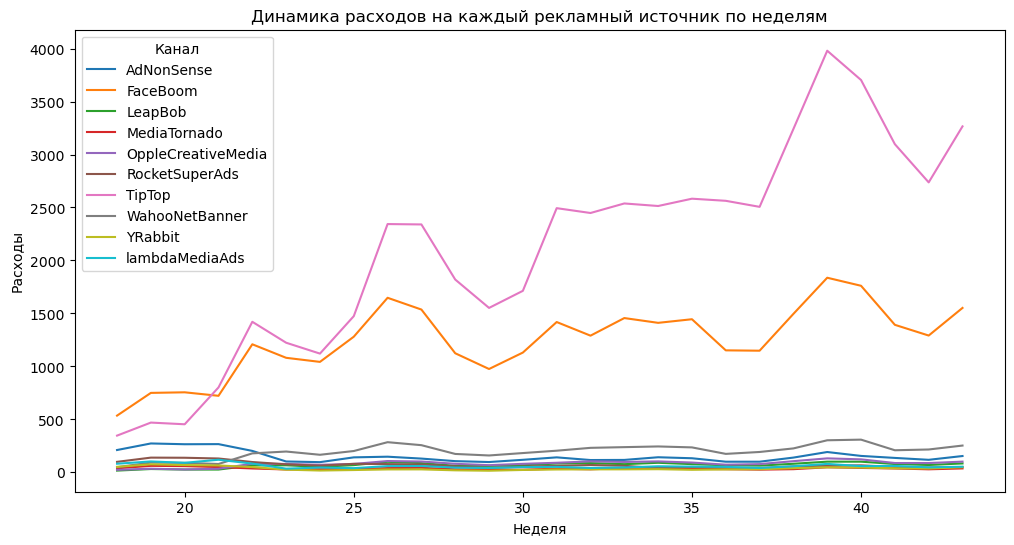

In [112]:
weekly_costs.plot(kind = 'line', figsize = (12,6))
plt.xlabel('Неделя')
plt.ylabel('Расходы')
plt.title('Динамика расходов на каждый рекламный источник по неделям')
plt.legend(title = 'Канал')
plt.show()

График демонстрирует, что наибольшие рекламные расходы были привлечены на рекламные источники Tip Top и Face Boom.

Создадим график расходов по месяцам.

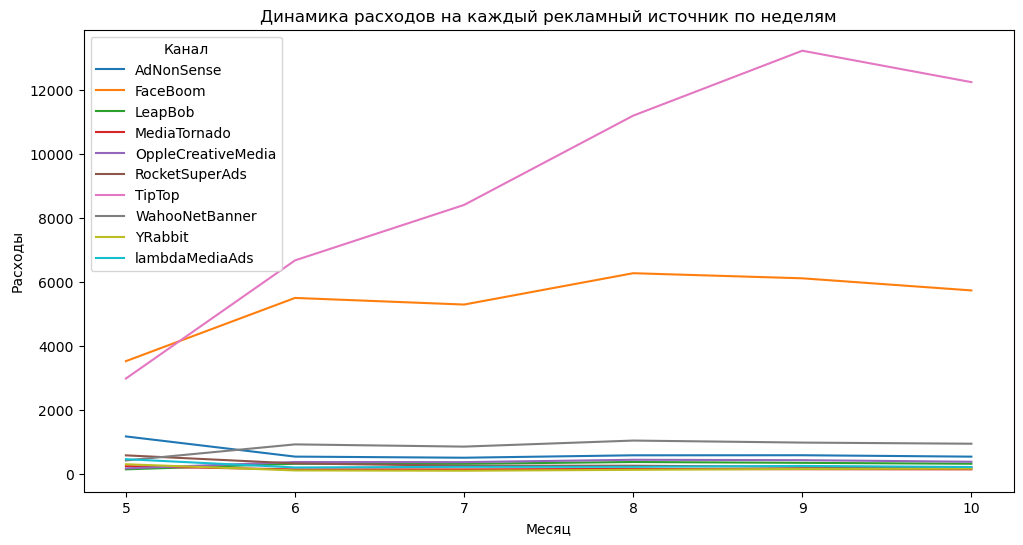

In [114]:
costs['month'] = costs['dt'].dt.month
monthly_costs = costs.pivot_table(index='month',columns = 'Channel', values = 'costs', aggfunc = 'sum')
monthly_costs.plot(kind = 'line', figsize = (12,6))
plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.legend(title = 'Канал')
plt.title('Динамика расходов на каждый рекламный источник по неделям')
plt.show()

Месячные расходы на Tip Top имеют практически линейный рост.

Вычислим средний CAC для каждого источника, создав сводную таблицу, в которой для каждого канала будет указано среднее значение CAC.

In [119]:
CAC_by_channels = profiles.pivot_table(index = 'Channel', values = 'acquisition_cost', aggfunc = 'mean').sort_values(by='acquisition_cost',ascending=False)
CAC_by_channels.head()

,acquisition_cost
Channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245


Как и в общих расходах на рекламу, в таблице среднего CAC лидируют Tip Top и Face Boom.

Наибольшие затраты на рекламу идут для источников Tip Top и Face Boom. При этом расходы на Tip Top возможно неоправданно высокие, т.к. данный источник не входит в тройку источников с самой высокой долей платящих пользователей. Стоит обратить внимание на источники AdNonSense и lambdaMediaAds, т.к. они имеют более высокую долю платящих пользователей.

## Оценка окупаемости рекламы

Построим графики LTV и ROI, а также их динамики и CAC.

Для того, чтобы построить графики, нужно получить соотвествующие таблицы. Сделаем это с помощью написанной нами ранее функции .get_ltv(), учитывая что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. 

In [123]:
# исключим из дальнейшего анализа органических пользователей 
profiles = profiles.query('Channel not in "organic"')
profiles['Channel'].unique()

array(['FaceBoom', 'AdNonSense', 'YRabbit', 'MediaTornado',
       'RocketSuperAds', 'LeapBob', 'TipTop', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

In [125]:
ltv_raw,ltv,ltv_history,roi,roi_history = get_ltv (profiles,orders,datetime(2019,11,1).date(),14)

Построим графики.

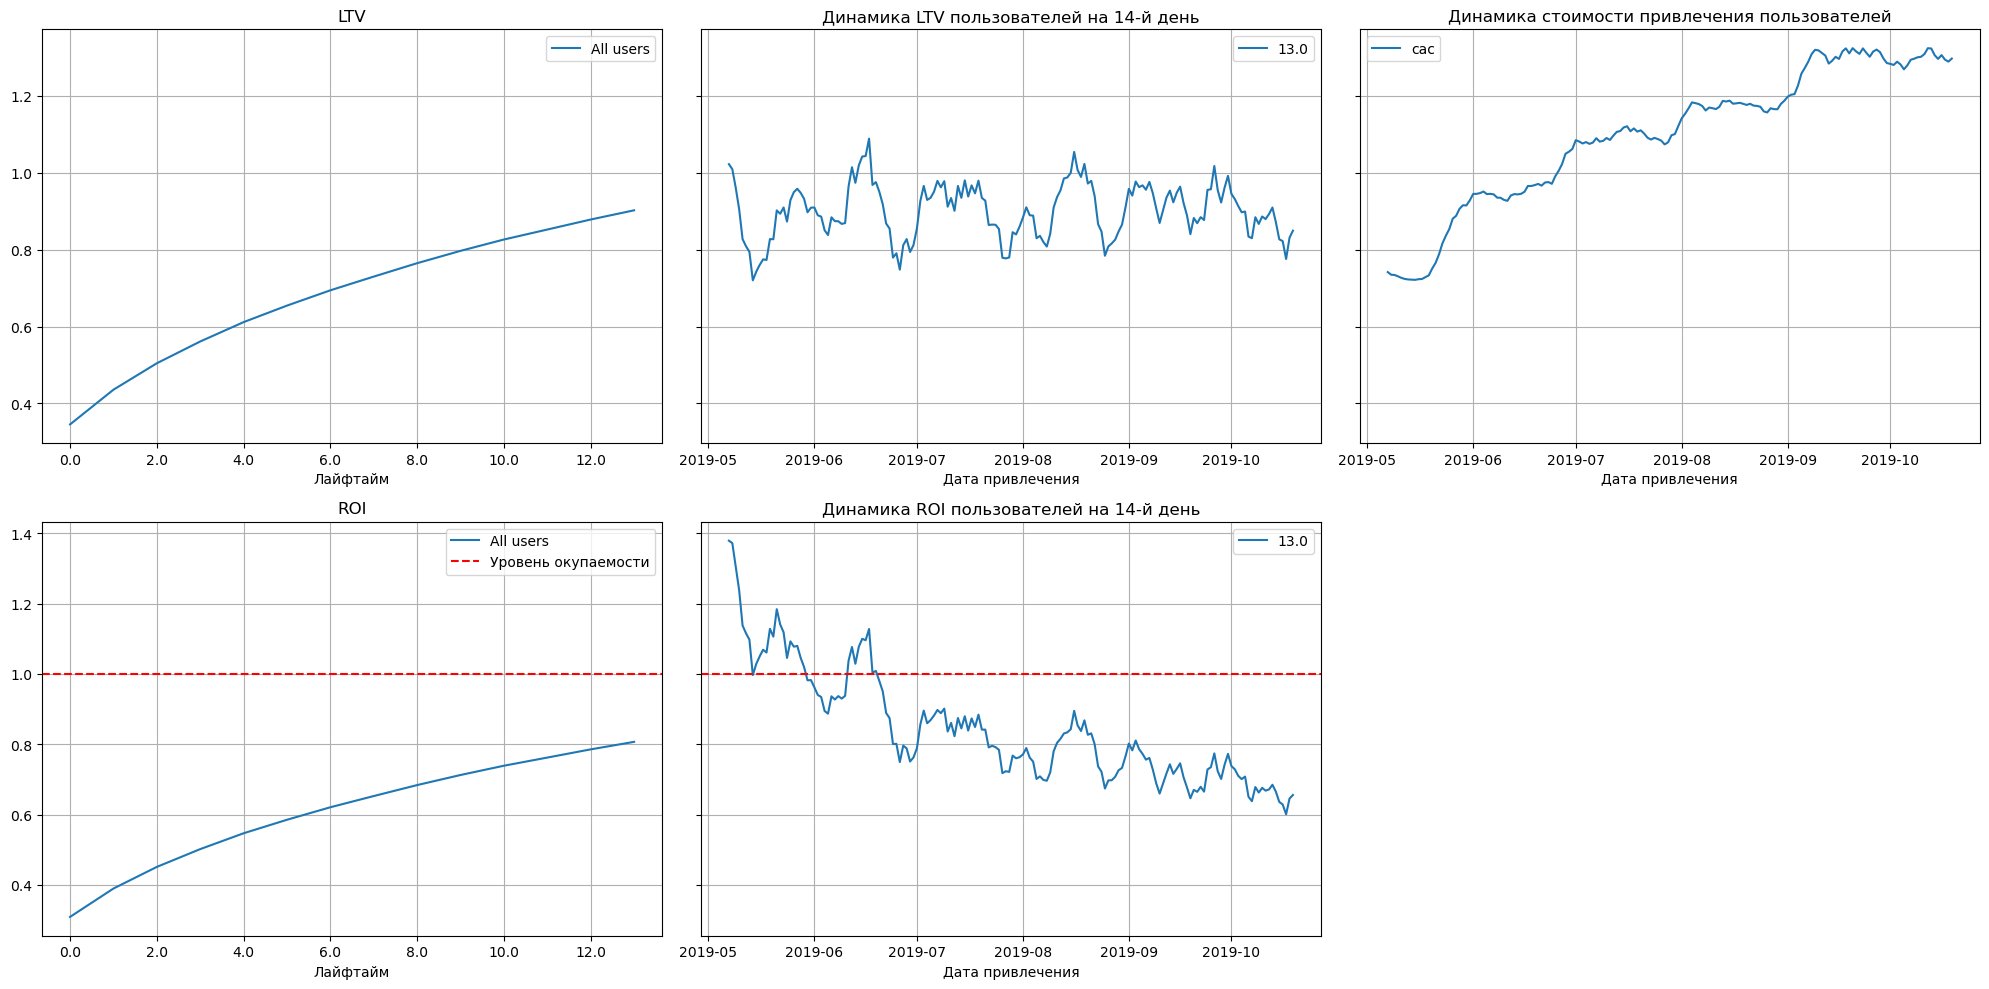

In [127]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

К сожалению, инвестиции в рекламу не окупаются, несмотря на большие расходы на неё. Более того, уровень окупаемости со временем становится только ниже и с июля расходы на рекламу больше, чем доходы от нее.

Построим график конверсии и ее динамики, создав изначально таблицу конверсии и истории конверсии.

In [144]:
conversion_raw, conversion, conversion_history = get_conversion(profiles, orders, datetime(2019,11,1).date(), 14)

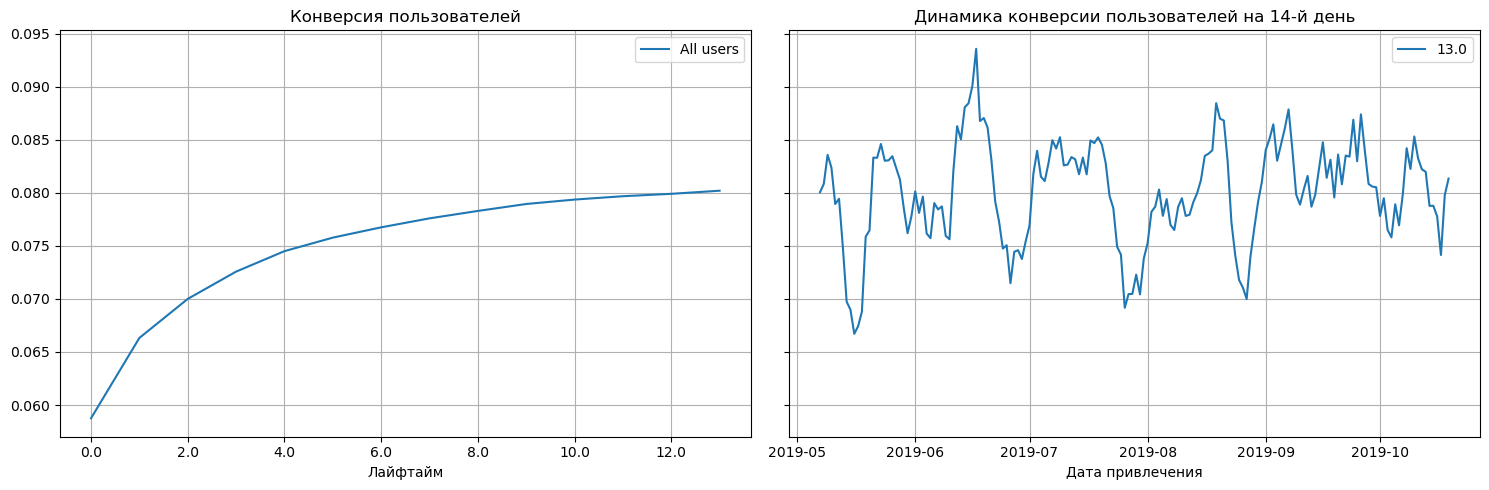

In [152]:
plot_conversion(conversion, conversion_history, 14)

Уровень конверсии низкий и находится на уровне 8%, а по историческим данным конверсия на 14-й лайфтайм не превышала 9,5%.

Создадим график удержания и его динамики, создав перед этим соответствующие таблицы.

In [156]:
retention_raw, retention, retention_history = get_retention(profiles,visits,datetime(2019,11,1).date(),14)

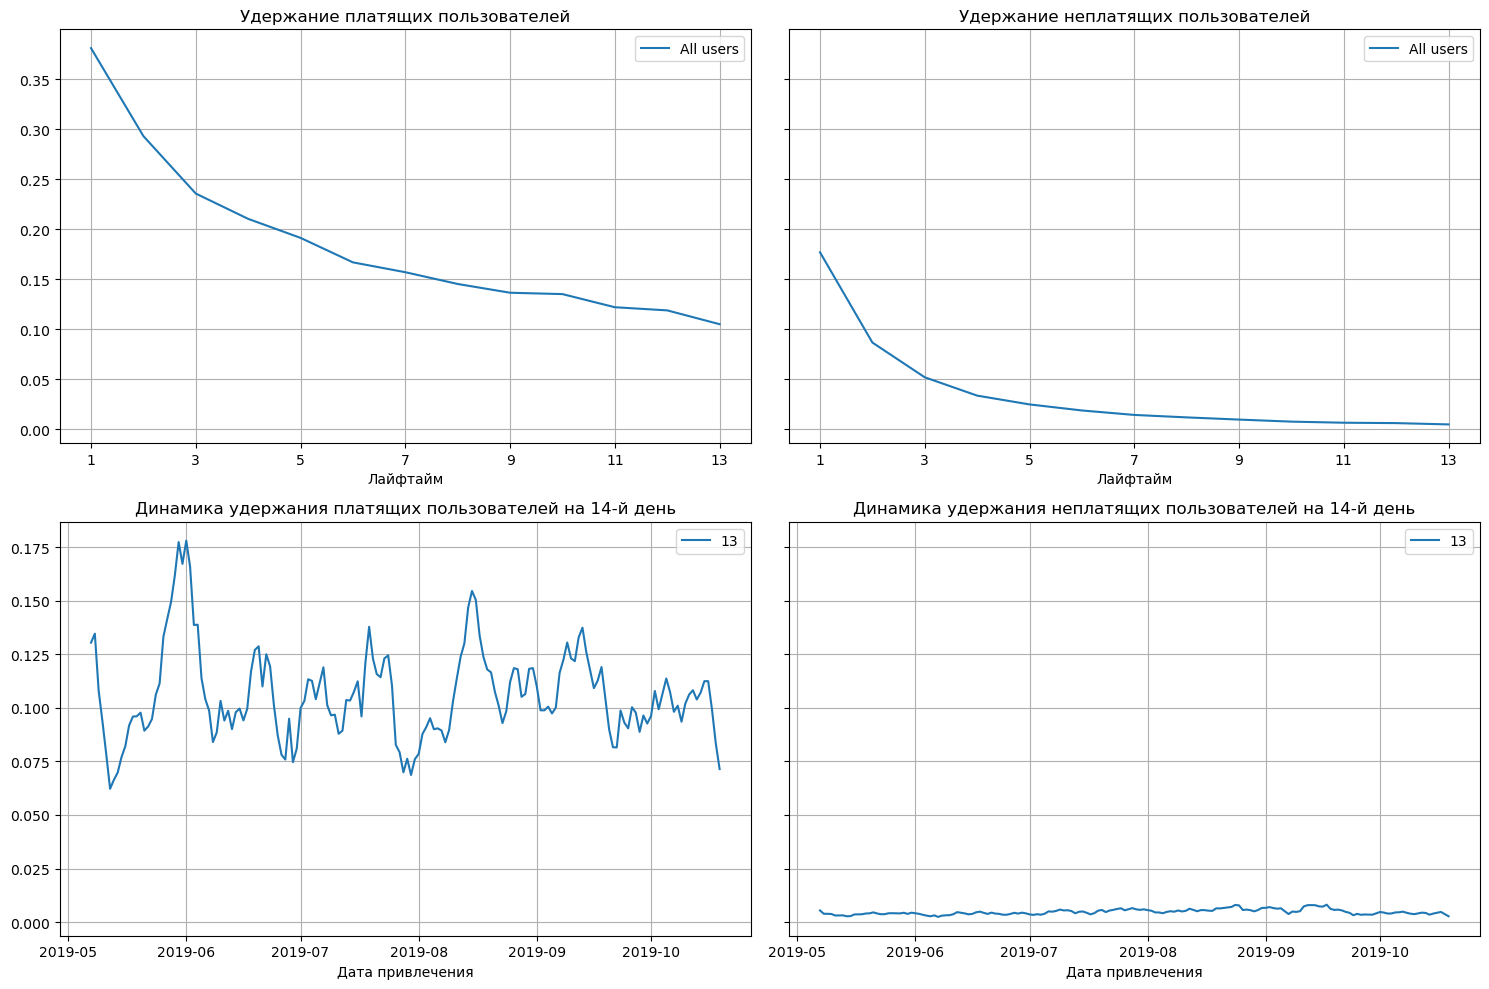

In [158]:
plot_retention (retention, retention_history, 14)

Удержание 14-го лайфтайма для платящих пользователей в районе 10-15%. Удержание неплатящих пользователей к 4-му лайфтайму меньше 5%, что говорит о том, что у неплатящих пользователей быстро пропадает интерес к приложению.

Посмотрим на окупаемость рекламы с разбивкой по устройствам.

In [161]:
ltv_raw,ltv,ltv_history,roi,roi_history = get_ltv(profiles, orders, datetime(2019,11,1).date(),14,dimensions = ['Device'])

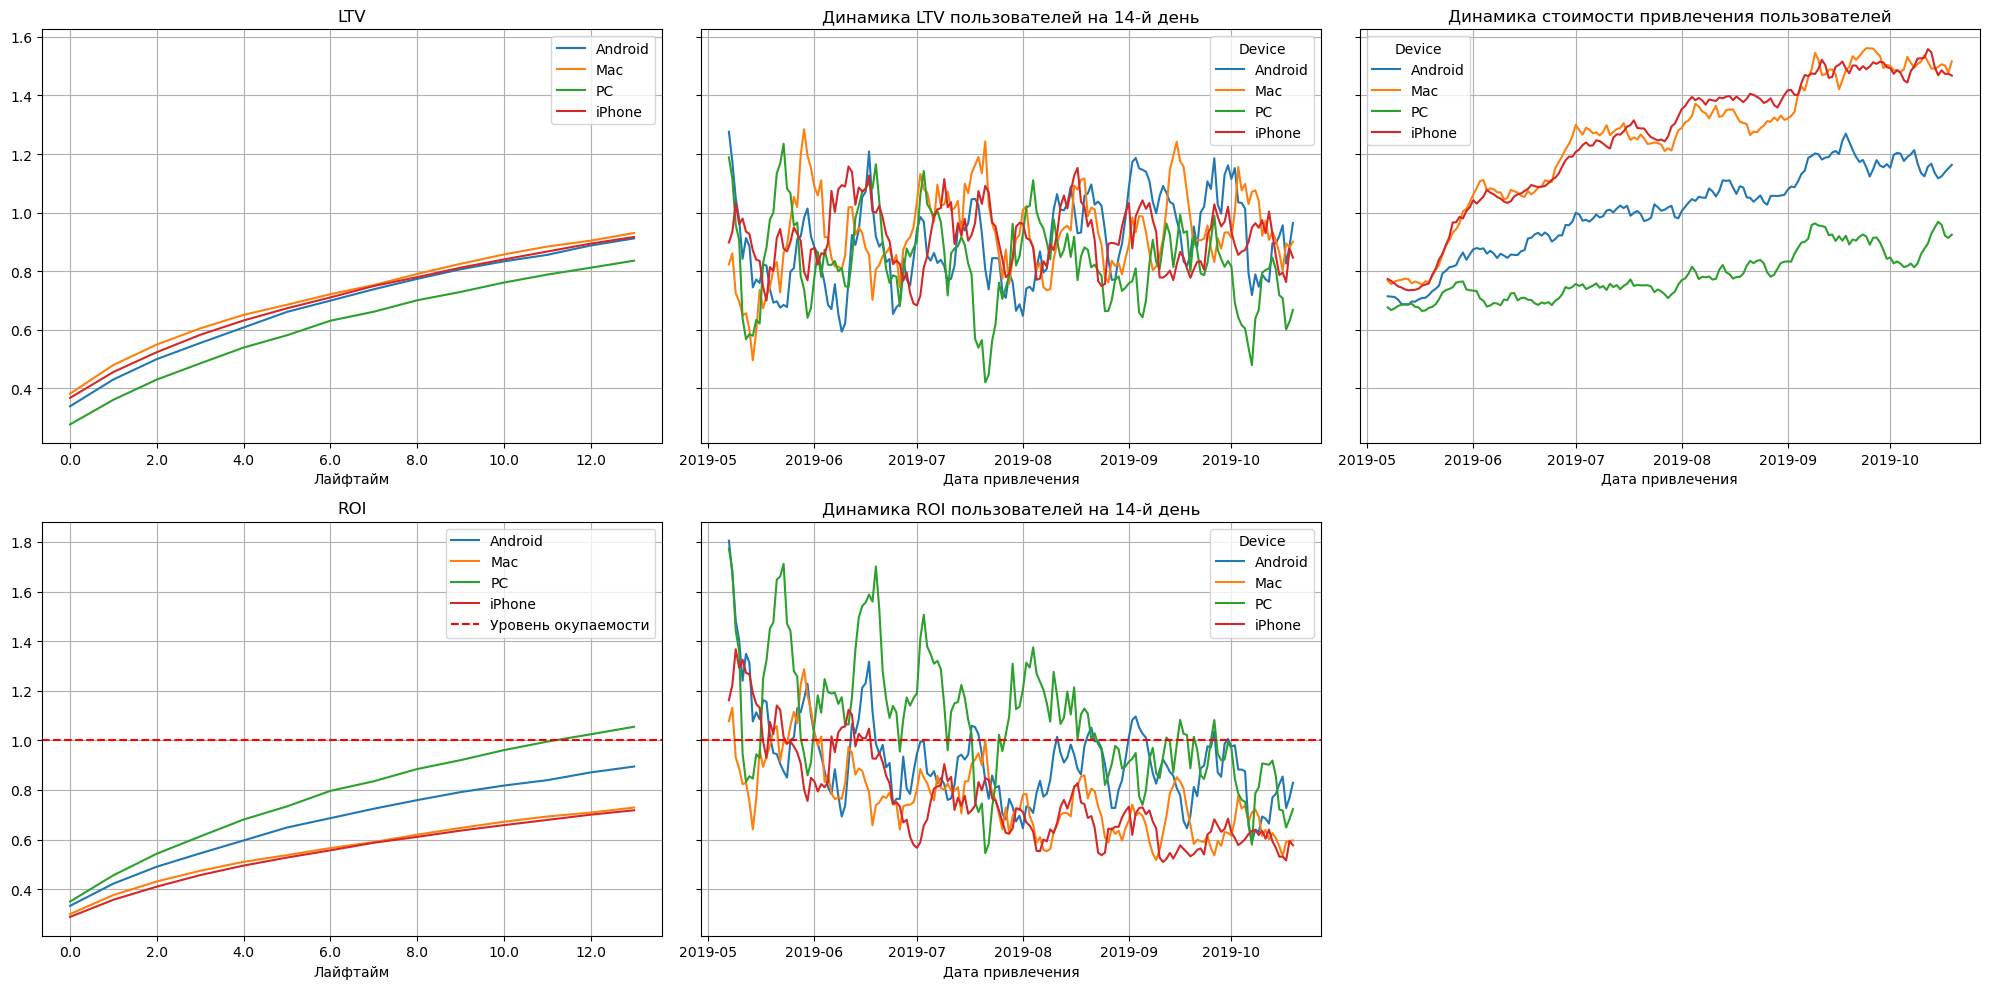

In [163]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

Маркетинговые инвестиции окупились для пользователей ПК. Учитывая то, что затраты на рекламу для этих двух платформ самые низкие, можно сделать предварительный вывод о том, что рекламные расходы для пользователей IPhone и Mac неоправданно высокие.

Посмотрим на окупаемость устройств с разбивкой по странам.

In [166]:
ltv_raw,ltv,ltv_history,roi,roi_history = get_ltv(profiles, orders, datetime(2019,11,1).date(),14,dimensions = ['Region'])

<Figure size 1500x2000 with 0 Axes>

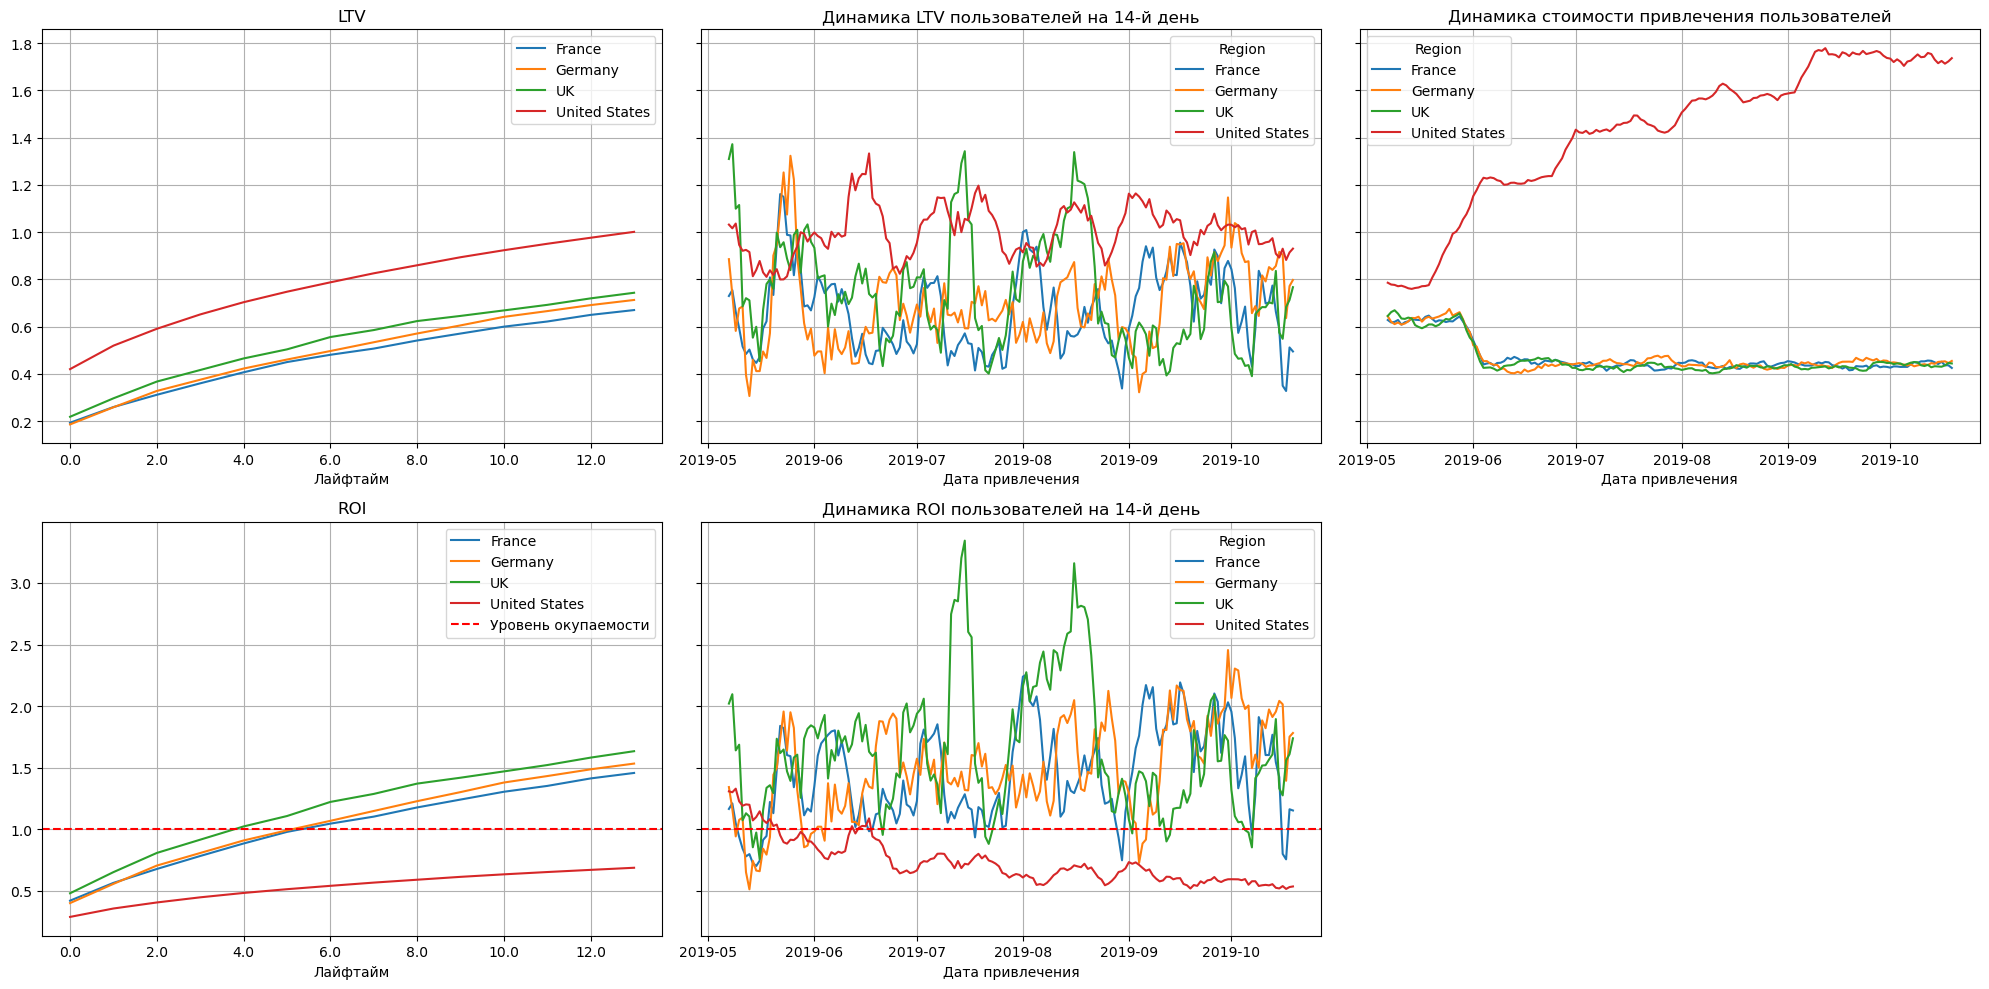

In [168]:
plt.figure(figsize = (15,20))
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)
plt.show()

На рекламу в США были выделены слишком большие расходы, которые не окупились. Расходы на рекламу в остальных странах окупаются. 

Рассмотрим окупаемость рекламы по рекламным каналам.

In [170]:
ltv_raw,ltv,ltv_history,roi,roi_history = get_ltv(profiles, orders, datetime(2019,11,1).date(),14,dimensions = ['Channel'])

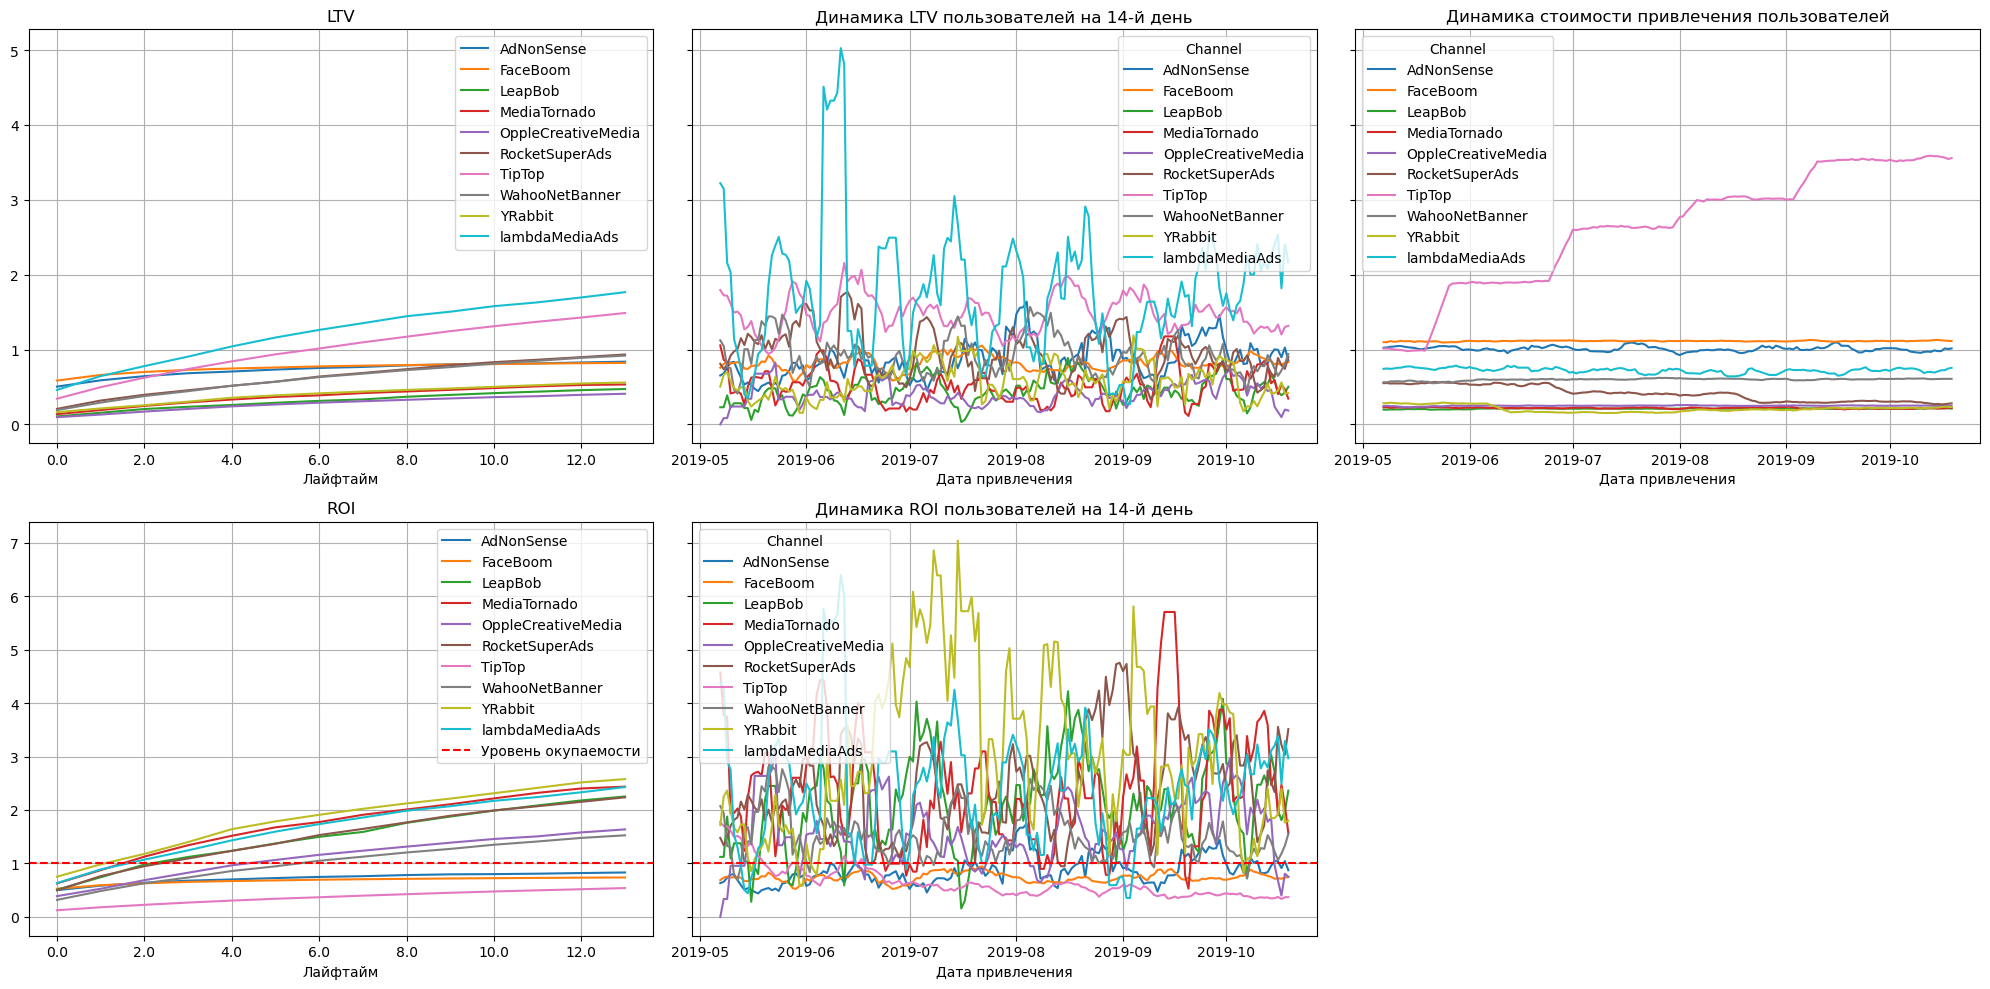

In [172]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)
plt.show()

Графики очень маленькие и нечитаемые.
Сделаем поправке в коде функции "plot_ltv_roi", чтобы графики стали больше.

Самые большие LTV имеют пользователи, перешедшие из рекламных источников Lambda Media Ads и Tip Top. При этом стоимость привлечения пользователей из Tip Top очень высокая, и из-за этого пользователи из данного источника не окупаются. 

Построим графики конверсии с разбивкой по каналам.

In [175]:
conversion_raw, conversion, conversion_history = get_conversion(profiles, orders, datetime(2019,11,1).date(),14,dimensions = ['Channel'])

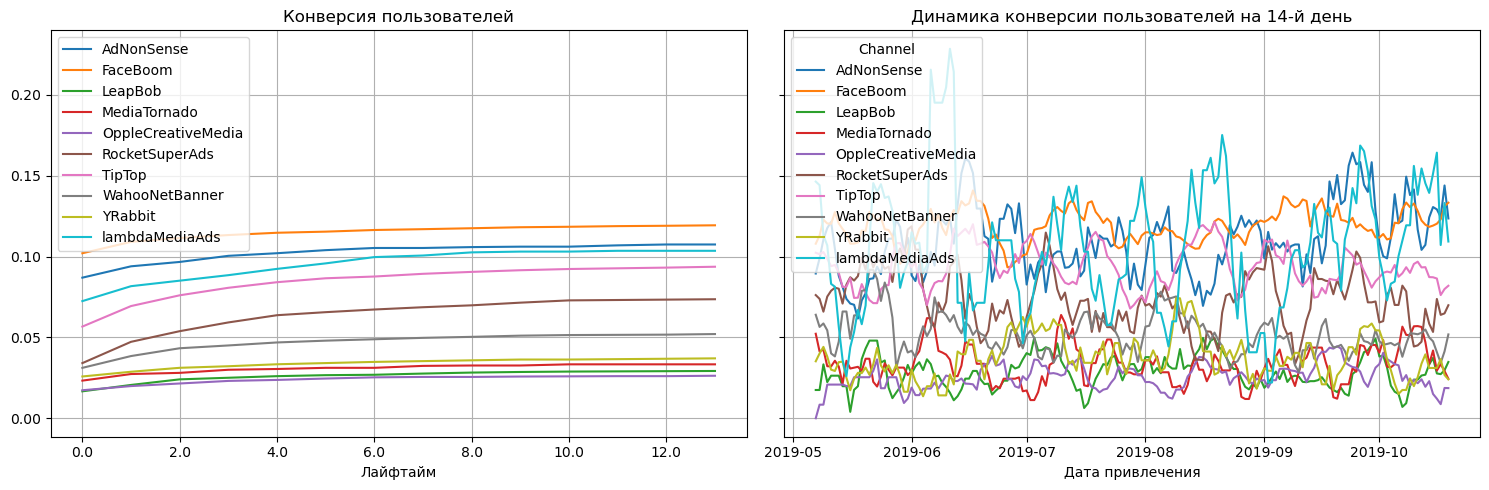

In [177]:
plot_conversion(conversion, conversion_history, 14)

Конверсия пользователей к 14-му лайфтайму незначительно отличается от конверсии нулевого лайфтайма. Практически по всем каналам конверсия к 4-му лайфтайму выходит на плато. Это говорит о том, что у пользователей со временем не появляется интерес к покупке приложения

Построим графики удержания с разбивкой по каналам.

In [181]:
retention_raw, retention, retention_history = get_retention(profiles, visits, datetime(2019,11,1).date(),14,dimensions = ['Channel'])

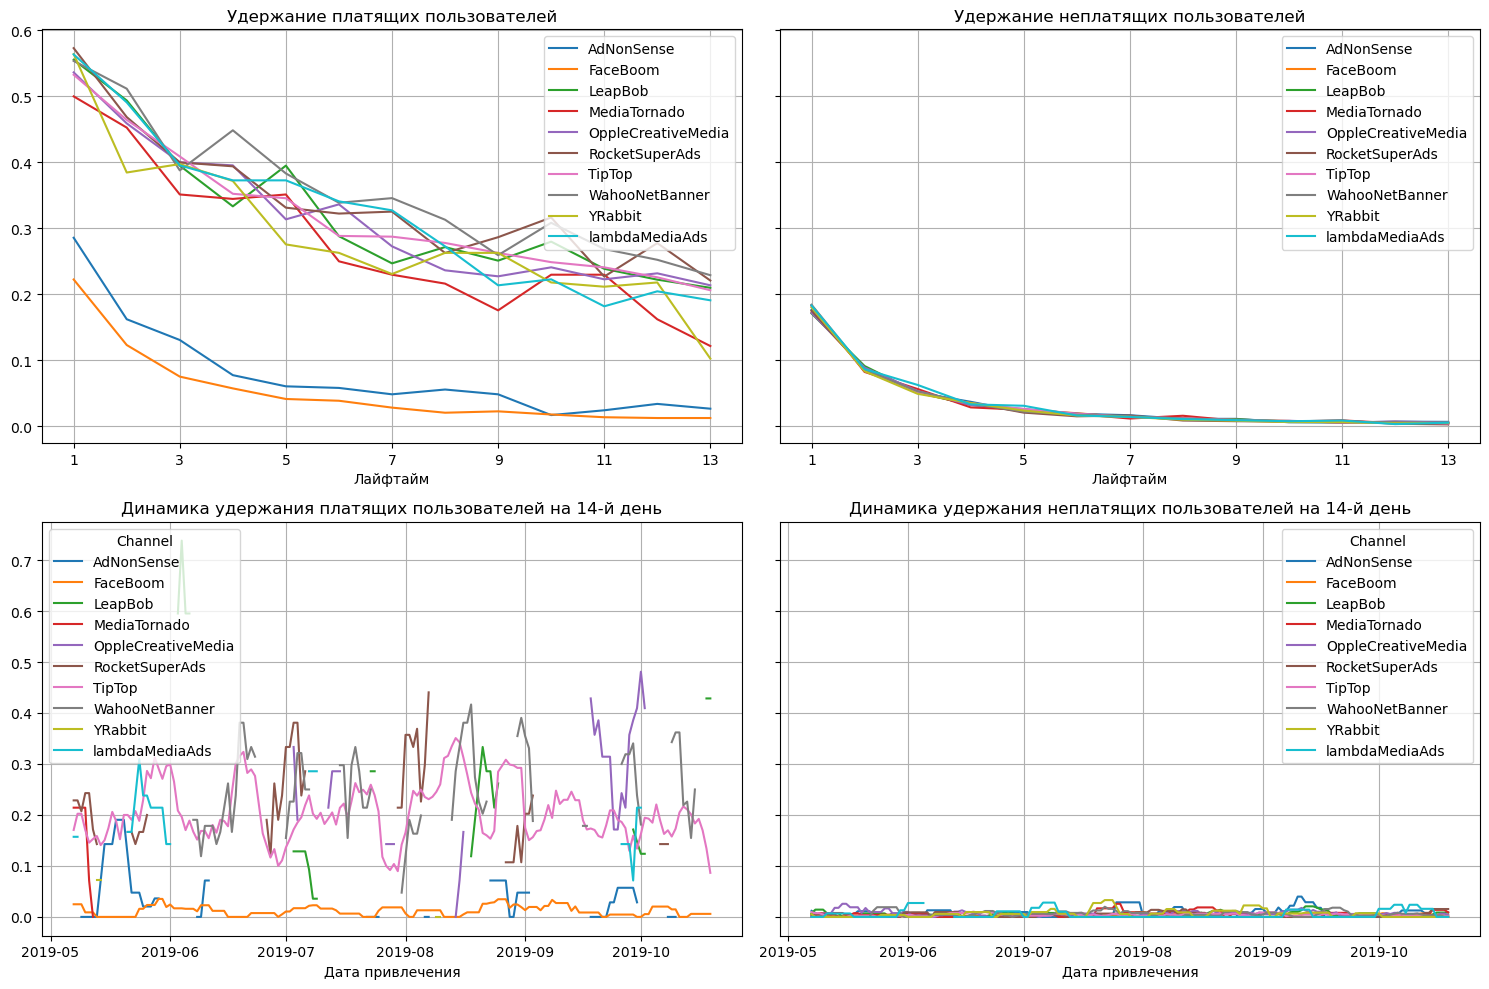

In [183]:
plot_retention(retention, retention_history,14)

Удержание пользователей из AdNonSense и Face Boom ниже, чем у остальных источников.

<b>Ответы на вопросы.</b>
Инвестиции на рекламу в целом не окупаются.

Негативное влияние на окупаемость имеют такие устройства как Iphone и Mac, из стран на окупаемость негативно влияет США, а из рекламных каналов - Tip Top. 

С другой стороны данные устройства, страны и рекламные каналы имеют неплохой LTV, но на их рекламу были проинвестированы (и продолжают инвестироваться) слишком большие суммы денег, что и вызвало проблемы окупаемости.

Прежде чем приступить к выводам проверим гипотезу: негативное влияние на ROI имеет в первую очередь рекламный канал, а негативное влияние затрат на пользователей США и пользователей устройств Apple - следствие того, что данный рекламный канал работает именно в США и для пользователей IPhone и Mac.

Чтобы проверить гипотезу, отфильтруем датасет с профилями пользователей, чтобы в него из рекламных каналов входил только Tip Top.

In [187]:
Tip_Top = profiles.query('Channel == "TipTop"')
#проверим работу фильтра, посмотрев уникальные значения столбца с рекламными источниками
Tip_Top['Channel'].unique()

array(['TipTop'], dtype=object)

Создадим сводную таблицу по странам и на основе ее построим график, где будет указана доля пользователей каждой страны у данного рекламного источника.

In [189]:
Tip_Top_countries = Tip_Top.pivot_table(index='Region',values='User Id', aggfunc = 'count').sort_values(by='User Id',ascending= False)

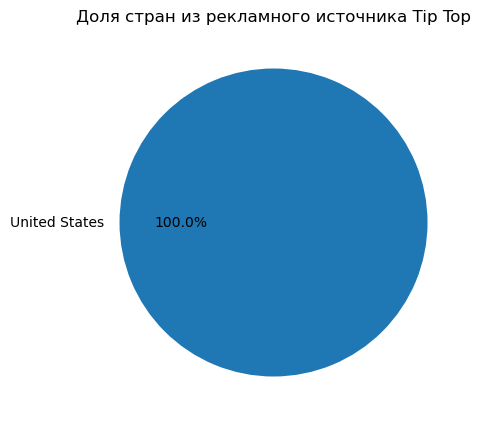

In [193]:
Tip_Top_countries.plot(kind='pie', y = 'User Id', figsize = (5,5), 
title = 'Доля стран из рекламного источника Tip Top',legend = False,autopct='%1.1f%%')
plt.ylabel('')
plt.show()

Действительно, данный рекламный источник работает только в Соединенных Штатах.

Сделаем то же самое для устройств.

In [195]:
Tip_Top_devices = Tip_Top.pivot_table(index = 'Device', values = 'User Id', aggfunc = 'count').sort_values(by='User Id', ascending=False)

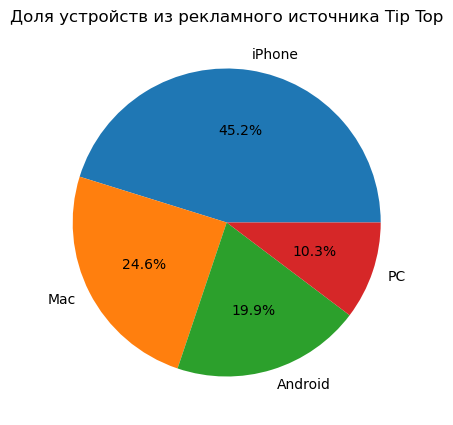

In [197]:
Tip_Top_devices.plot(kind='pie', y = 'User Id', figsize = (5,5), 
title = 'Доля устройств из рекламного источника Tip Top',legend = False,autopct='%1.1f%%')
plt.ylabel('')
plt.show()

Tip Top работает для всех типов устройств. Доля устройств Apple занимает около 70%, однако это самые популярные девайсы в США и возможно затраты на рекламу для этих устройств дорогие сами по себе. Для того, чтобы проверить так ли это проанализируем LTV, ROI, CAC с разбивкой по устройствам и их динамику исключив рекламный канал Tip Top из анализа.

In [199]:
# Создаем срез, куда войдут все рекламные каналы кроме Tip Top и проверим его, посмотрев уникальные значения столбца с рекламными каналами
No_Tip_Top = profiles.query('Channel not in "TipTop"')
No_Tip_Top['Channel'].unique()

array(['FaceBoom', 'AdNonSense', 'YRabbit', 'MediaTornado',
       'RocketSuperAds', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

In [201]:
#создаем таблицы ltv, roi и их динамики на основе отфильтрованного датасета
ltv_raw,ltv,ltv_history,roi,roi_history = get_ltv(No_Tip_Top, orders, datetime(2019,11,1).date(),14,dimensions = ['Device'])

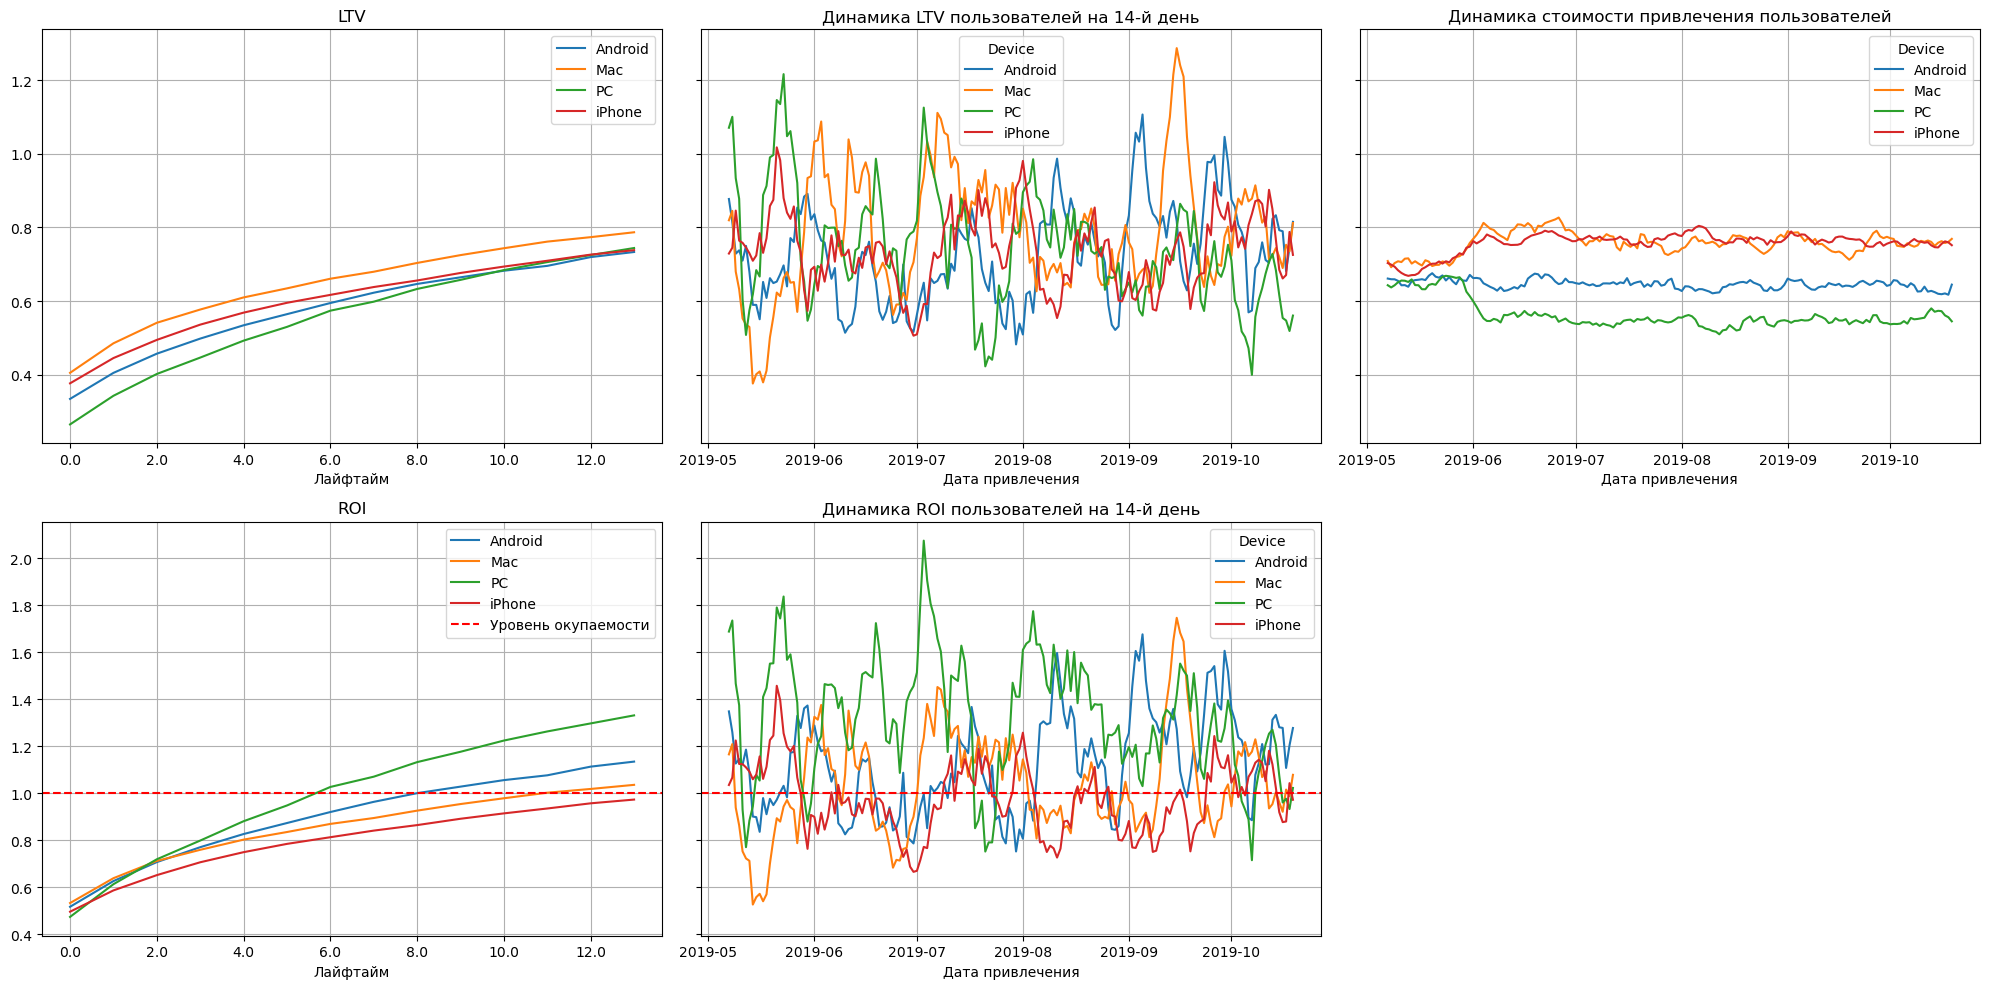

In [203]:
#строим графики
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

Стоимость привлечения пользователей Iphone и Mac сравнялась с другими устройствами и инвестиции в рекламу теперь окупаются. Значит дело в первую очередь в рекламном источнике.

## Выводы

Причиной неэффективности привлечения пользователей являются слишком большие расходы на рекламу в источниках Tip Top и Face Boom, которые себя не оправдывают. В первый вложено неадекватно большое количество денег, со второго приходят некачественные пользователи с низким уровнем удержания.

Рекоммендую сократить инвестиции в данные рекламные источники. Для Tip Top до уровня мая 2019 года, для Face Boom прекратить инвестиции вовсе. Также рекоммендую немного увеличить инвестиции в источники Lambda Media Ads и AdNonsense, т.к. они имеют высокую долю платящих пользователей, и проанализировать в динамике их окупаемость. 